# Ejemplos del problema de los tres cuerpos

# Definiciones

In [1]:
using LinearAlgebra
using Plots
using JLD2
using Dates, LaTeXStrings

In [2]:
PATH_SRC="../../src_seq/"
PATH_DATA="./Data/"

include(string(PATH_SRC,"IRKGL_SEQ.jl"))
using .IRKGL_SEQ 


PATH_SRC="../../src_simd/"

include(string(PATH_SRC,"IRKGL_SIMD.jl"))
using .IRKGL_SIMD 

In [3]:
PATH_ODES="../../ODEProblems/"

include(string(PATH_ODES,"Nbody3REL.jl"))

NbodyODE3REL! (generic function with 2 methods)

## Problema de los 3 cuerpos

## Figura de ocho

In [4]:
P = 8.709181405774647
iter = 3

t0=0.
T=P
tspan=(t0,T)

N=3
u0 = Array{Float64}(undef,2,N,2)

Gm=[1.,1.,1.]

u0[:,1,1]=[4.174139657659669,-0.8893300081730157]
u0[:,2,1]=[0.0,1.7786600163460313]
u0[:,3,1]=[-4.174139657659669,-0.8893300081730157]

u0[:,1,2]=[5.657918578094723e-12,0.29121363636009084]
u0[:,2,2]=[0.6835491799130686,-0.14560681817678106]
u0[:,3,2]=[-0.6835491799187265,-0.14560681818330978]



du0=similar(u0)
NbodyODE3REL!(du0,u0,Gm,0.)
du0

2×3×2 Array{Float64, 3}:
[:, :, 1] =
  0.683549  -1.3671       0.683549
 -0.43682   -6.52872e-12  0.43682

[:, :, 2] =
 0.107393  -0.0536966  -0.0536966
 0.0        0.327533   -0.327533

In [9]:
prob =ODEProblem(NbodyODE3REL!, u0, tspan, Gm)


n=100
dt=(T-t0)/n

alg=IRKGL_simd(s=8, initial_interp=1, myoutputs=true)
sol,iters,steps=solve(prob,alg,dt=dt, adaptive=false);
[dt steps]

1×2 Matrix{Float64}:
 0.0870918  100.0

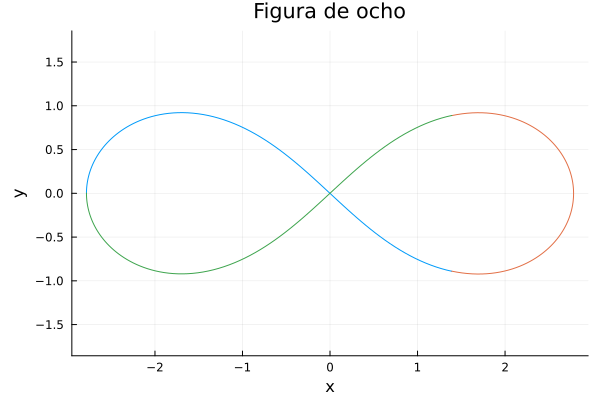

In [10]:
tt = sol.t

function coord_bar(out,u)
    
    @. out[:,1,1]=u[:,3,1]-u[:,1,1]
    @. out[:,2,1]=u[:,1,1]-u[:,2,1]
    @. out[:,3,1]=u[:,2,1]-u[:,3,1]
    
    return (1/3*out)

end

out=similar(u0)
solb=[coord_bar(out,u) for u in sol.u]

x1 = [u[1,1,1] for u in solb]
y1 = [u[2,1,1] for u in solb]
x2 = [u[1,2,1] for u in solb]
y2 = [u[2,2,1] for u in solb]
x3 = [u[1,3,1] for u in solb]
y3 = [u[2,3,1] for u in solb]


plot(title="Figura de ocho", aspect_ratio=1, xlabel="x", ylabel="y", legend=false)
plot!(x1,y1)
plot!(x2,y2)
plot!(x3,y3)

In [7]:
E0=NbodyEnergy3REL(sol.u[1],Gm)

-0.4999999999999999

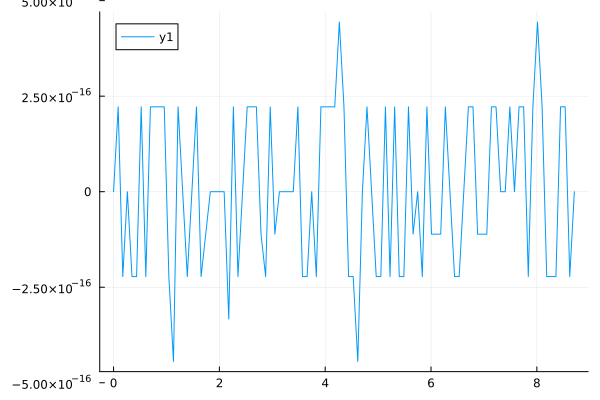

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/M092a/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/M092a/src/ticks.jl:191


In [11]:
DE=map(x->NbodyEnergy3REL(x,Gm), sol.u)./E0.-1

plot(sol.t,DE)